# FastQC Metrics of Interest

Here I am looking to define cutoffs for QC metrics that are part of fastqc.

In [3]:
# %load ../start.py
# Load useful extensions

# Activate the autoreload extension for easy reloading of external packages
%reload_ext autoreload
%autoreload 2

# Set up cashdir
from ipycache import CacheMagics
CacheMagics.cachedir = '../cachedir'

# Trun on the water mark
%reload_ext watermark
%watermark -u -d -v

# Load ipycache extension
%reload_ext ipycache
from ipycache import CacheMagics
CacheMagics.cachedir = '../cachedir'

# Add project library to path
import sys
sys.path.insert(0, '../../lib/python')

# The usual suspects
import os
import numpy as np
import pandas as pd

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('poster')

# Turn off scientific notation
np.set_printoptions(precision=5, suppress=True)


last updated: 2017-03-07 

CPython 3.5.2
IPython 5.3.0


In [4]:
from ncbi_remap.parser import parse_files, parse_fastqc_base_quality

In [5]:
%%cache -s flist.pkl flist
# Get a list of all files
flist = []
for root, dirs, files in os.walk('../../output/prealignment/raw'):
    for file in files:
        flist.append(os.path.join(root, file))

## Per Base Quality Scores

In [6]:
%%cache -s fqc_per_base_qual.pkl fqc
# Import logs and munge
fqc = parse_files(flist, '../../output/prealignment/raw/{experiment}/{sample}/{sample}_fastqc.zip', parse_fastqc_base_quality)

In [7]:
# Use NaN to get read length
read_len = pd.Series((~np.isnan(fqc.values)).argmin(axis=1), index=fqc.index)
read_len.sort_values(inplace=True)

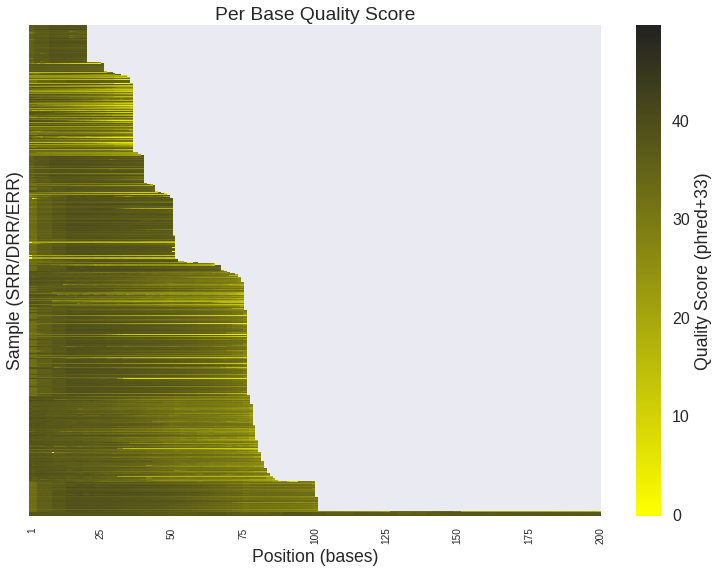

In [8]:
# plot heatmap of per base quality scores
ax = sns.heatmap(fqc.loc[read_len.index].iloc[:, :200], 
                 cmap=sns.dark_palette('yellow', as_cmap=True, reverse=True), 
                 yticklabels=False,
                 cbar_kws={'label': 'Quality Score (phred+33)'}
                )
ra = [1, 25, 50, 75, 100, 125, 150, 175, 200]
_ = ax.set_xticks(ra)
_ = ax.set_xticklabels(ra, fontsize=10)
_ = ax.set_xlabel('Position (bases)')
_ = ax.set_ylabel('Sample (SRR/DRR/ERR)')
_ = ax.set_title('Per Base Quality Score')

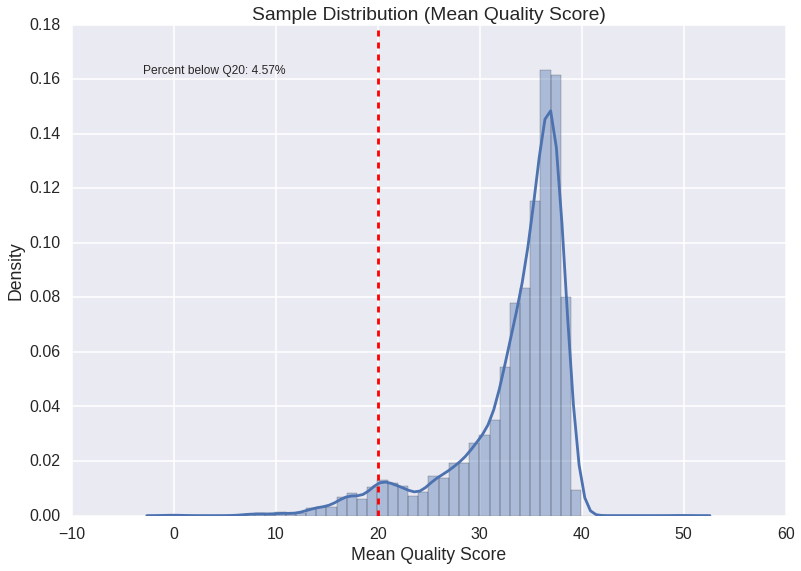

In [9]:
# Plot density of mean quality
Qscore = fqc.mean(axis=1, skipna=True)
ax = sns.distplot(Qscore)
_ = ax.set_title('Sample Distribution (Mean Quality Score)')
_ = ax.set_xlabel('Mean Quality Score')
_ = ax.set_ylabel('Density')

_ = ax.axvline(20, ls='--', color='r')
s = 'Percent below Q20: {:.3}%'.format(((Qscore < 20).sum() / Qscore.count()) * 100)
_ = ax.text(.1, .9, s, transform=ax.transAxes, fontsize=12)

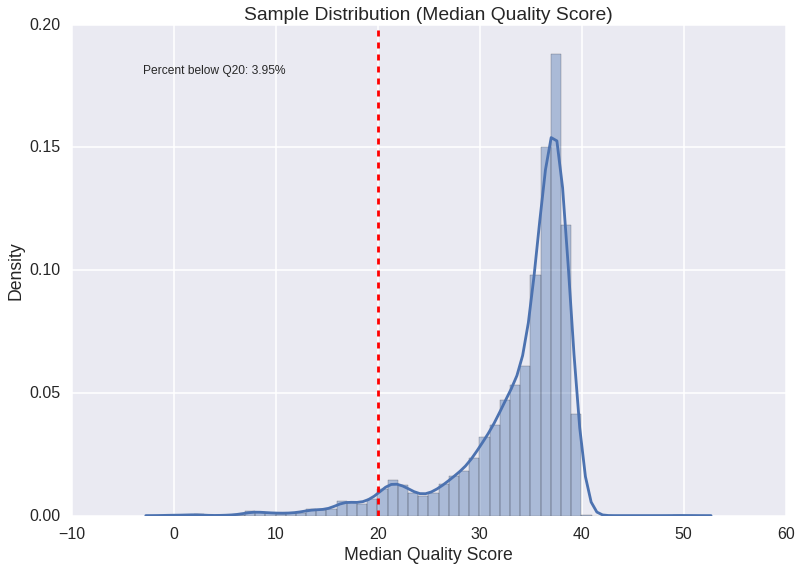

In [10]:
# Plot density of median quality
Qscore = fqc.median(axis=1, skipna=True)
ax = sns.distplot(Qscore)
_ = ax.set_title('Sample Distribution (Median Quality Score)')
_ = ax.set_xlabel('Median Quality Score')
_ = ax.set_ylabel('Density')

_ = ax.axvline(20, ls='--', color='r')
s = 'Percent below Q20: {:.3}%'.format(((Qscore < 20).sum() / Qscore.count()) * 100)
_ = ax.text(.1, .9, s, transform=ax.transAxes, fontsize=12)

In [11]:
# Make a flag data frame
Qscore = fqc.median(axis=1, skipna=True)
flag_median_per_base_quality_lt_20 = Qscore.index[Qscore < 20].tolist()

In [12]:
len(flag_median_per_base_quality_lt_20)

402